In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd

In [3]:
bdd = pd.read_csv("/neurospin/dico/jchavas/Runs/61_classifier_regresser/Output/flanker/summary/bdd_2023-09-21_pericalcarine.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [4]:
len(bdd)

45

AUC = 0.5537373737373738 +/- 0.0320040023608503
AUC-1 = 0.5537373737373738 +/- 0.0320040023608503
AUC-2 = 0.5352958152958153 +/- 0.030075002703618653
AUC (best model) = 0.5600288600288601 +/- 0.02888454946772682


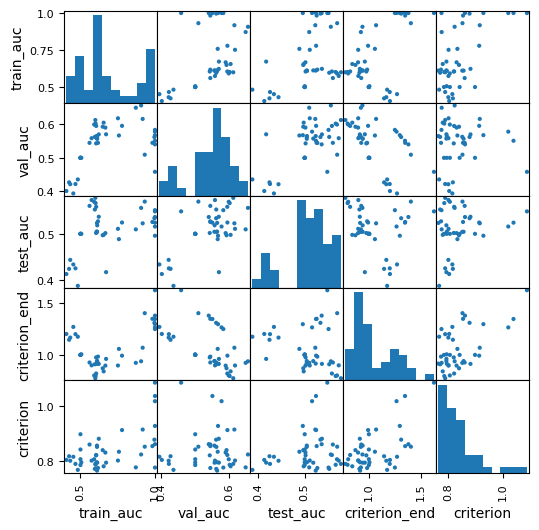

In [5]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end_old"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["criterion_end"] = bdd.apply(lambda x: 2*(1-x["val_auc"]) + max(-x["val_auc"] + x["train_auc"], 0), axis=1)
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_end_old = bdd.sort_values(by=['criterion_end_old'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-1 = {best_end_old['test_auc'].mean()} +/- {best_end_old['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'criterion_end', 'criterion']],
                                 figsize=(6,6),
                                 alpha=1.0)

In [6]:
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")

AUC = 0.5537373737373738 +/- 0.0320040023608503
AUC-2 = 0.5352958152958153 +/- 0.030075002703618653
AUC (best model) = 0.5600288600288601 +/- 0.02888454946772682


Text(0, 0.5, 'best_test_auc')

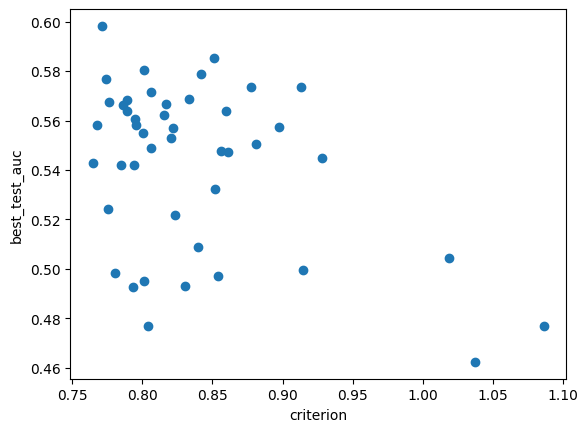

In [7]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

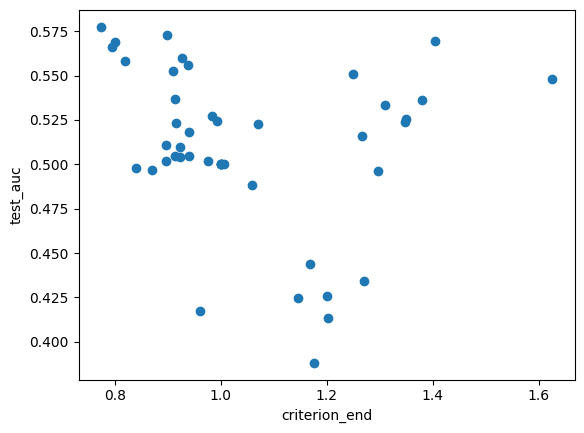

In [8]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'test_auc')

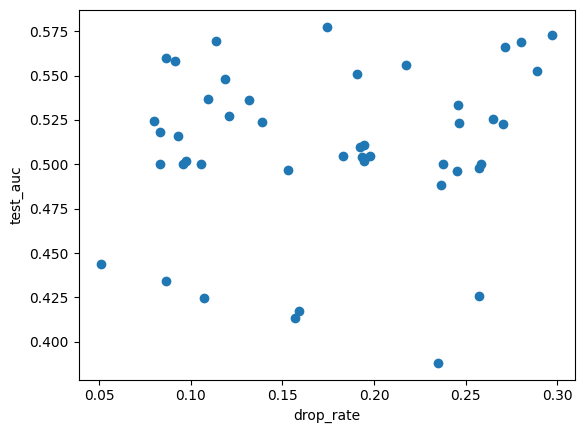

In [9]:
plt.scatter(bdd.drop_rate, bdd.test_auc)
plt.xlabel("drop_rate")
# plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'test_auc')

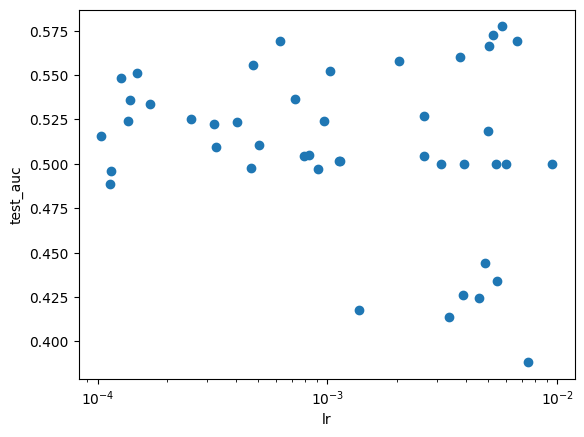

In [10]:
plt.scatter(bdd.lr, bdd.test_auc)
plt.xlabel("lr")
plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

(0.7, 0.85)

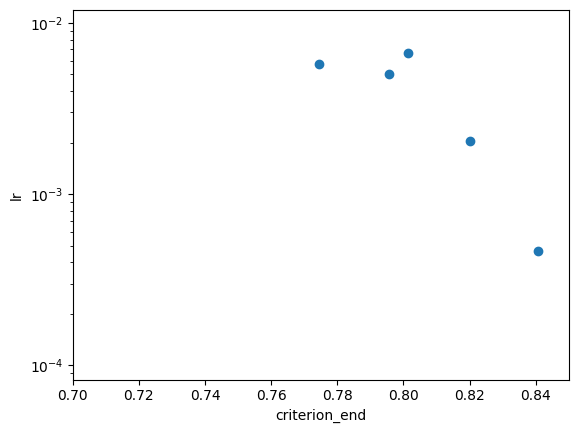

In [11]:
plt.scatter(bdd["criterion_end"], bdd.lr)
plt.xlabel("criterion_end")
plt.ylabel("lr")
plt.yscale("log")
plt.xlim((0.7,0.85))

(0.7, 0.85)

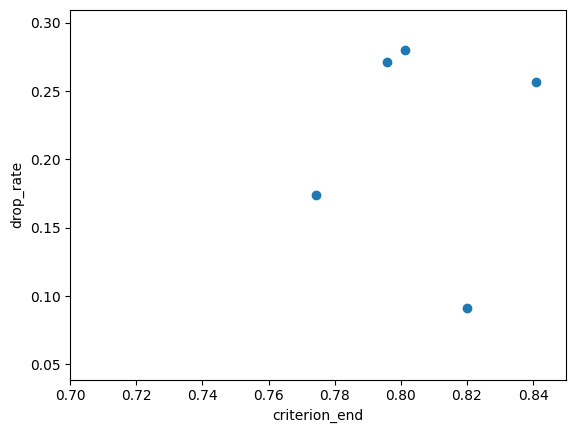

In [12]:
plt.scatter(bdd["criterion_end"], bdd.drop_rate)
plt.xlabel("criterion_end")
plt.ylabel("drop_rate")
# plt.yscale("log")
plt.xlim((0.7,0.85))

In [13]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [14]:
test_auc

[0.5537373737373738,
 0.5205266955266955,
 0.5243578643578644,
 0.536002886002886,
 0.48773448773448774,
 0.5048773448773449,
 0.48398268398268396,
 0.44450216450216445,
 0.4948773448773448,
 0.5388167388167389]

In [15]:
error

[0.014312624966185003,
 0.017636856023330667,
 0.009289433165949957,
 0.012857769060252426,
 0.024046656810933802,
 0.0048773448773448795,
 0.020997613089922176,
 0.02811426785599663,
 0.021638968209157373,
 0.01054938343216658]

Text(0, 0.5, 'test_auc')

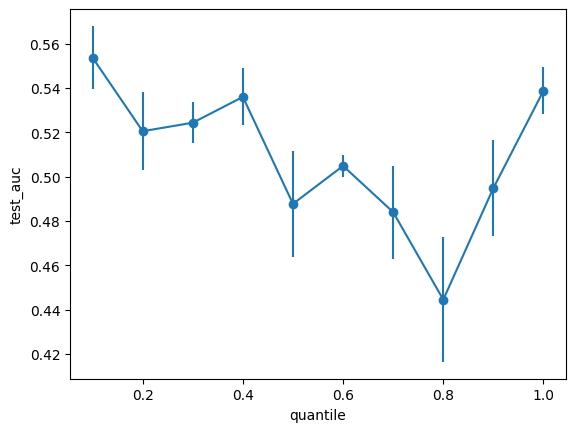

In [16]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
# plt.ylim((0.45,0.6))

(0.45, 0.6)

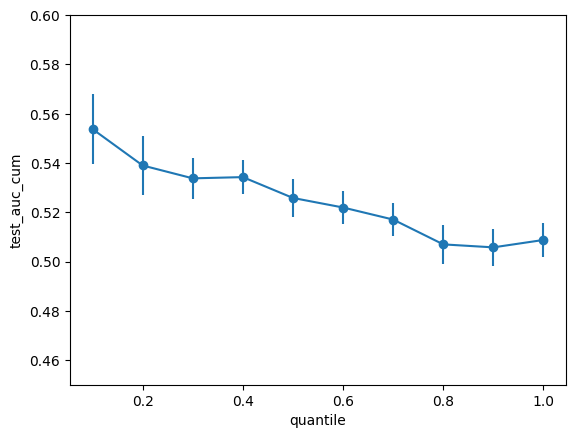

In [17]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

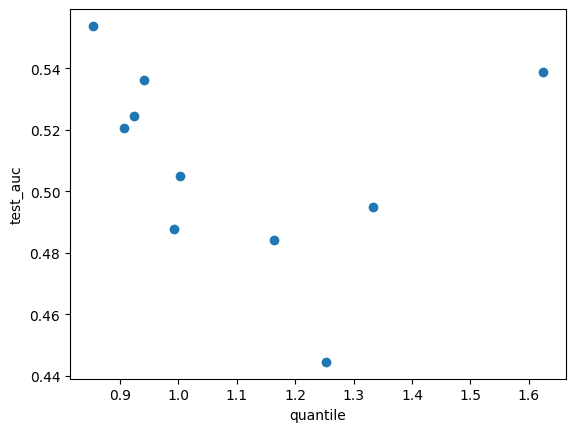

In [18]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

In [19]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

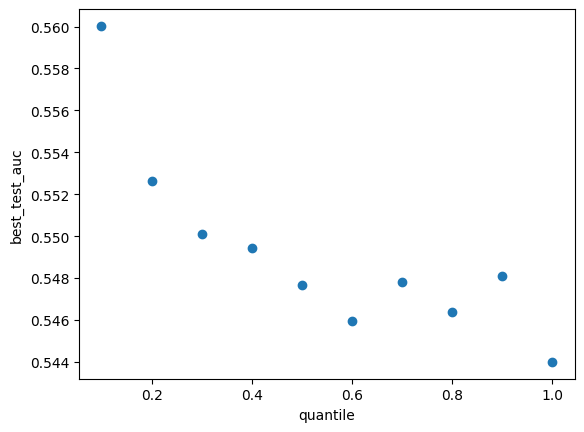

In [20]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

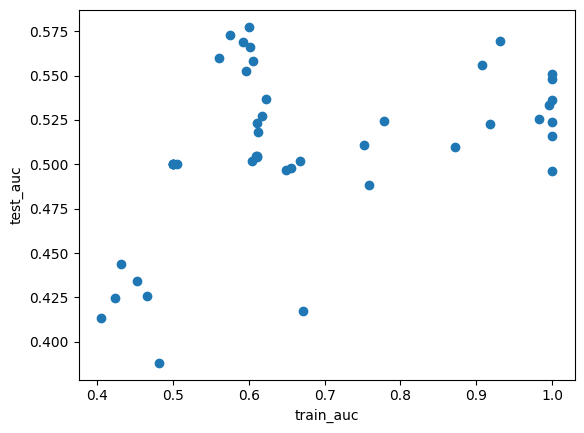

In [21]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

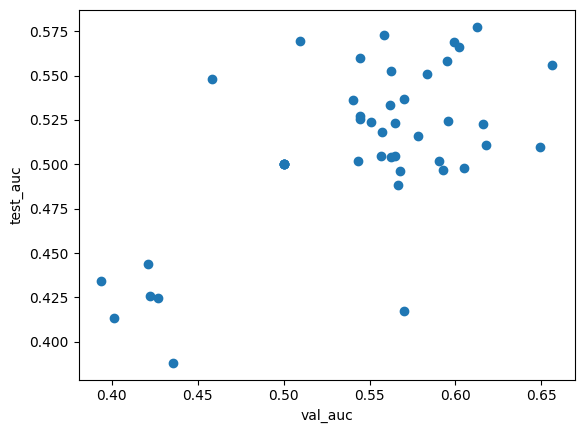

In [22]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'criterion')

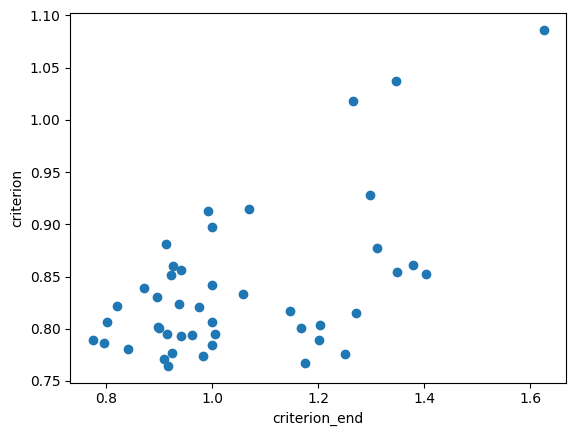

In [23]:
plt.scatter(bdd.criterion_end, bdd.criterion)
plt.xlabel("criterion_end")
plt.ylabel("criterion")

/tmp/ipykernel_3395487/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


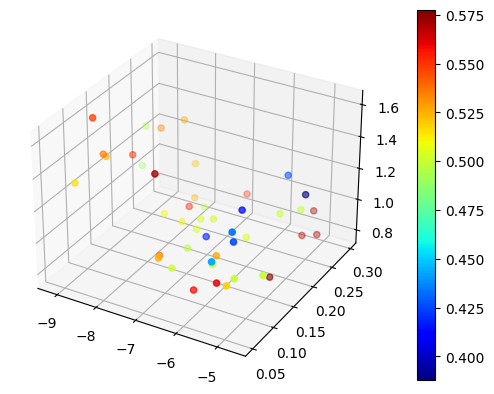

In [24]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_3395487/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


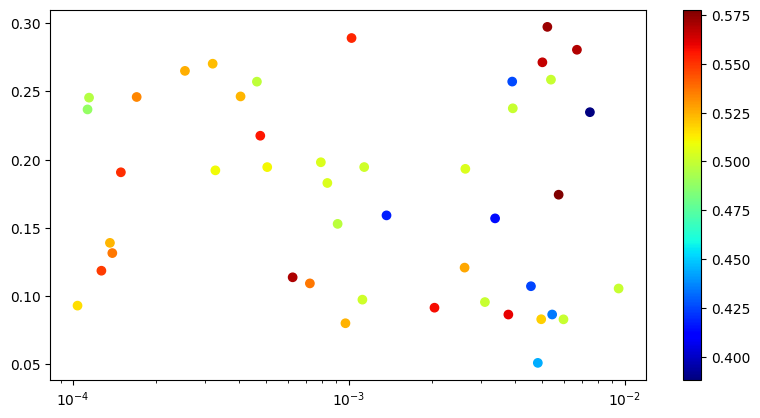

In [25]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_3395487/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


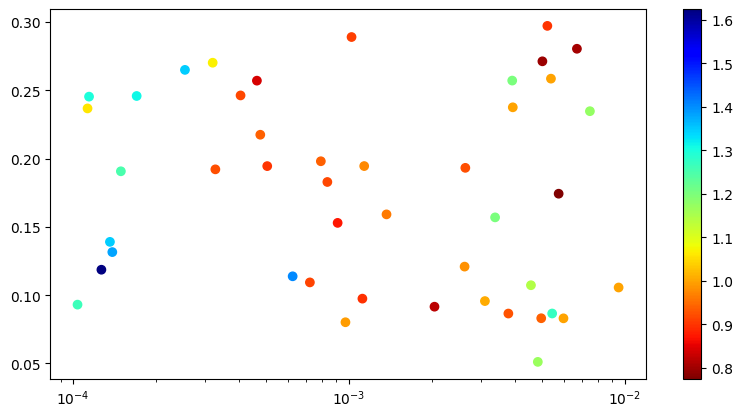

In [26]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'val_auc')

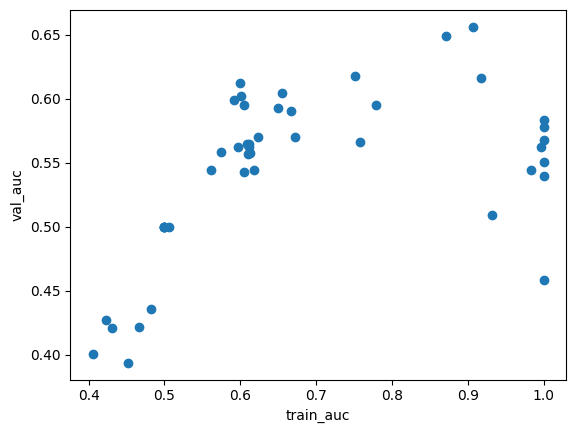

In [27]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

In [28]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end_old,criterion_end
7,/volatile2/jc225751/Runs/61_classifier_regress...,0.599733,0.612766,0.577489,0.593438,0.617349,0.568254,0.174267,0.922887,0.005756,138.664932,0.789214,0.787501,0.774468
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.601528,0.602128,0.566234,0.598020,0.616039,0.566234,0.271216,0.912108,0.005025,138.666763,0.785941,0.796344,0.795745
18,/volatile2/jc225751/Runs/61_classifier_regress...,0.592056,0.599345,0.568975,0.589389,0.604419,0.571429,0.280403,0.927877,0.006705,138.623795,0.806192,0.808599,0.801309
37,/volatile2/jc225751/Runs/61_classifier_regress...,0.605321,0.595090,0.558153,0.607019,0.595090,0.556999,0.091529,0.765521,0.002041,138.384888,0.821749,0.820051,0.820051
13,/volatile2/jc225751/Runs/61_classifier_regress...,0.655514,0.604910,0.497835,0.657956,0.625859,0.498124,0.257046,0.920062,0.000463,135.820206,0.780378,0.840784,0.840784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.550900,0.524098,0.815814,0.592799,0.462338,0.139002,0.901774,0.000136,89.689011,1.037418,1.347300,1.347300
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.982821,0.544681,0.525541,0.671800,0.605892,0.496970,0.264936,0.963447,0.000254,91.318039,0.854124,1.348778,1.348778
41,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.540098,0.536219,0.706361,0.615057,0.547186,0.131519,0.741693,0.000139,112.290459,0.861189,1.379705,1.379705
0,/volatile2/jc225751/Runs/61_classifier_regress...,0.931456,0.509329,0.569408,0.663852,0.603928,0.532179,0.113788,0.969026,0.000625,103.067703,0.852068,1.403469,1.403469
